In [1]:
# --- 0. Import libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split #! pip install sklearn
import keras #!pip install keras
from keras.models import Sequential 
from keras.layers import InputLayer 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.constraints import maxnorm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
print('Libraries imported')

Using TensorFlow backend.


Libraries imported


In [2]:
# --- 1. Load data
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

# Set workding directory
path="/Users/sooyoungkim/Desktop/Churn"
os.chdir(path)
os.getcwd()

# Load csv file
df = pd.read_csv("Churn_Modelling.csv")

# Data file
df.head(5)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
# --- 2. Data Preprocessing
# looking for null values
total_null_values = df.isnull().sum().sort_values(ascending=False) 
not_null_values = df.notnull().sum().sort_values(ascending=False) 
null_values_percentage = (df.isnull().sum()/df.notnull().count().sort_values(ascending=False)) * 100

# concating the calculated values with the data frame of null values
data_missing_values = pd.concat({'Null': total_null_values, 'Not Null': not_null_values, 'Percentage': null_values_percentage}, axis=1)

# view the newly formed dataframe
data_missing_values

,Null,Not Null,Percentage
Exited,0,10000,0.0
EstimatedSalary,0,10000,0.0
IsActiveMember,0,10000,0.0
HasCrCard,0,10000,0.0
NumOfProducts,0,10000,0.0
Balance,0,10000,0.0
Tenure,0,10000,0.0
Age,0,10000,0.0
Gender,0,10000,0.0
Geography,0,10000,0.0


In [4]:
df.HasCrCard.replace([0, 1], ["No", "Yes"], inplace= True)
df.IsActiveMember.replace([0, 1], ["No", "Yes"], inplace= True)
df.drop("CustomerId", axis= 1, inplace= True)
df.drop("RowNumber", axis= 1, inplace= True)
df.drop("Surname", axis= 1, inplace= True)

In [5]:
# pd.get_dummies creates a new dataframe which consists of zeros and ones
df = pd.get_dummies(df)
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_No,HasCrCard_Yes,IsActiveMember_No,IsActiveMember_Yes
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


In [6]:
# split dataset into X and Y
X = df.drop("Exited", axis= 1)
y = df.Exited

In [7]:
X.shape


(10000, 15)

In [8]:
# Split testing set with 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [9]:
# --- 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=42)
rf.fit(X_train, y_train) 
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Training set accuracy:  1.000
Test set accuracy:  0.863


In [10]:
# Predict class for X
rf_predictions = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)

In [11]:
# Confusion matrix
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1544   63]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

0.863


In [12]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
1,Age,0.245056
0,CreditScore,0.142977
5,EstimatedSalary,0.142856
3,Balance,0.135909
4,NumOfProducts,0.128799


In [13]:
# --- 4. Neural Network
model = Sequential()
model.add(Dense(64, input_dim=15, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=10)

Epoch 1/40
800/800 [==============================] - 2s 2ms/step - loss: 239.1346 - accuracy: 0.7696 - val_loss: 0.5624 - val_accuracy: 0.8035
Epoch 2/40
800/800 [==============================] - 1s 2ms/step - loss: 4.5234 - accuracy: 0.7905 - val_loss: 0.5113 - val_accuracy: 0.8035
Epoch 3/40
800/800 [==============================] - 1s 2ms/step - loss: 1.2670 - accuracy: 0.7934 - val_loss: 0.4995 - val_accuracy: 0.8035
Epoch 4/40
800/800 [==============================] - 1s 2ms/step - loss: 1.3875 - accuracy: 0.7935 - val_loss: 0.4969 - val_accuracy: 0.8035
Epoch 5/40
800/800 [==============================] - 1s 2ms/step - loss: 0.7725 - accuracy: 0.7931 - val_loss: 0.4962 - val_accuracy: 0.8035
Epoch 6/40
800/800 [==============================] - 1s 2ms/step - loss: 0.5446 - accuracy: 0.7944 - val_loss: 0.4959 - val_accuracy: 0.8035
Epoch 7/40
800/800 [==============================] - 1s 2ms/step - loss: 1.0254 - accuracy: 0.7943 - val_loss: 0.4958 - val_accuracy: 0.8035
Epoc

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

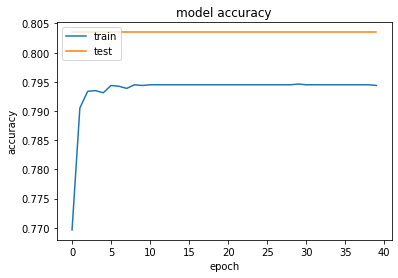

In [16]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()